In [1]:
import numpy as np
import pickle
import pandas as pd

from function import *

In [2]:
# Call this function to initialize the parameters of SEVN
Hobbs = {"sn_kicks":"hobbs"}
Hobbs_pure = {"sn_kicks":"hobbs_pure"}
fast = {"sn_kick_velocity_stdev":265}
slow = {"sn_kick_velocity_stdev":150}

#### Hobbs Fast Z=0.002

System evolution: 3 Gyr
Time: 0
Time before kick: 0.01
Time before kick: 0.02
Time before kick: 0.03
Time before kick: 0.04
Time before kick: 0.05
Time before kick: 0.060000000000000005
Time before kick: 0.07
Time before kick: 0.08
Time before kick: 0.09
Time before kick: 0.09999999999999999
Time before kick: 0.10999999999999999
Time before kick: 0.11999999999999998
Time before kick: 0.12999999999999998
Time before kick: 0.13999999999999999
Time before kick: 0.15
Time before kick: 0.16
Time before kick: 0.17
Time before kick: 0.18000000000000002
Time before kick: 0.19000000000000003
Time before kick: 0.20000000000000004
Time before kick: 0.21000000000000005
Time before kick: 0.22000000000000006
Time before kick: 0.23000000000000007
Time before kick: 0.24000000000000007
Time before kick: 0.25000000000000006
Time before kick: 0.26000000000000006
Time before kick: 0.2700000000000001
Time before kick: 0.2800000000000001
Time before kick: 0.2900000000000001
Time before kick: 0.3000000000000

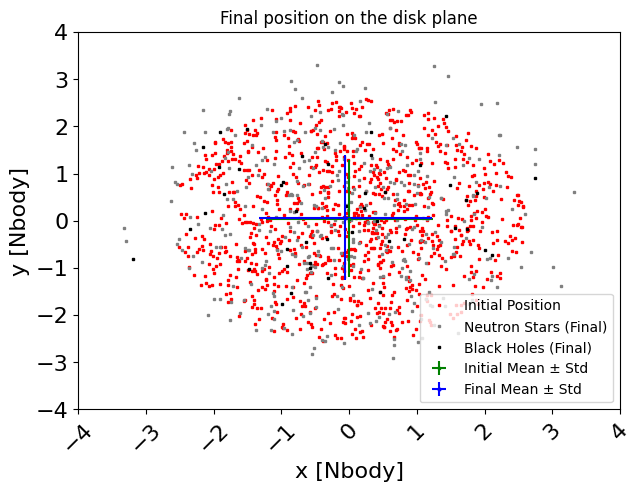

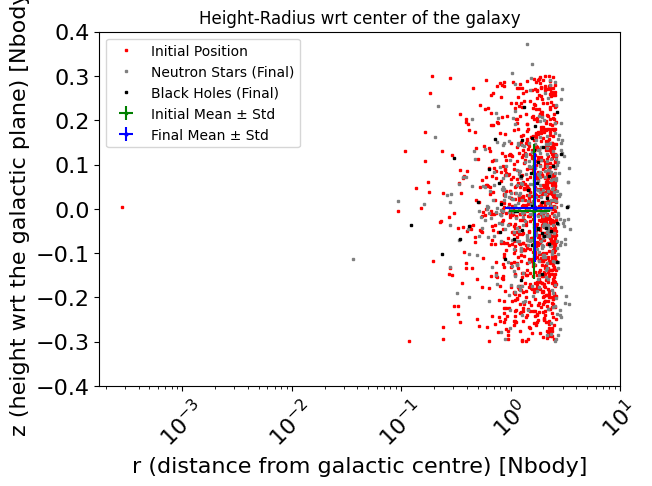

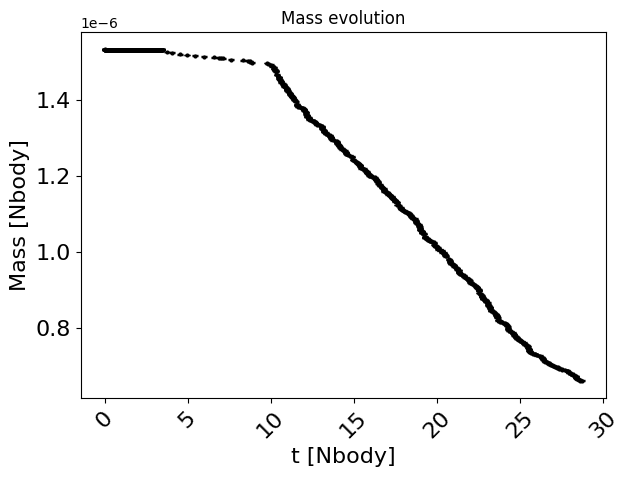

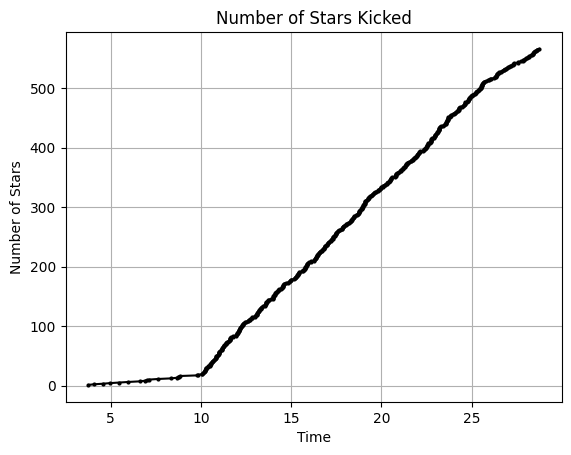

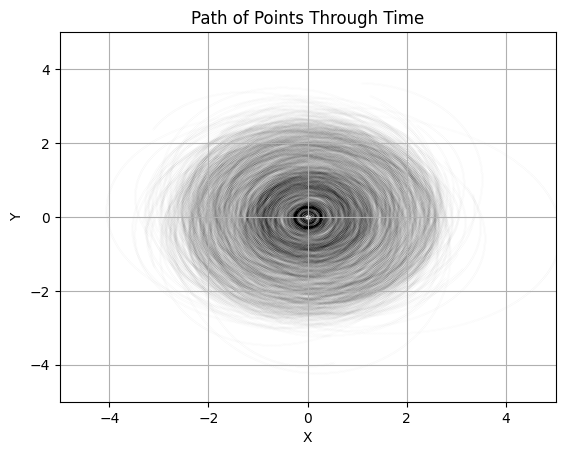

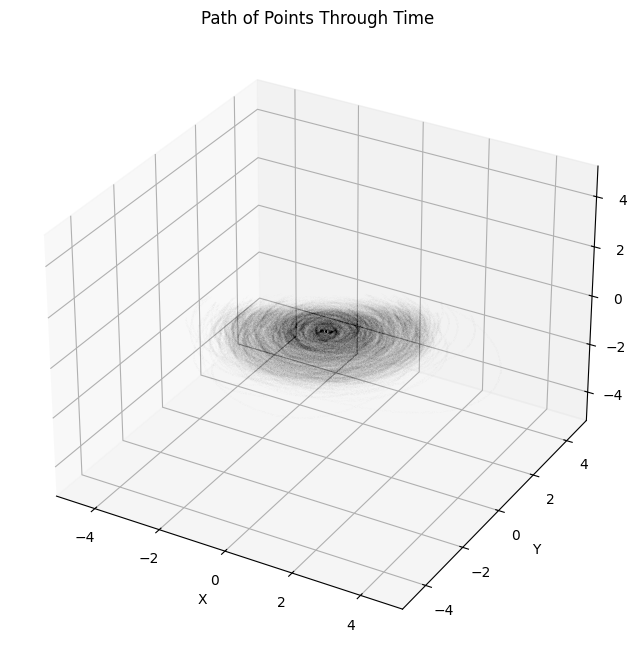

In [3]:
# Initialize SEVN parameters
sevn_init(Hobbs,fast)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.002
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

def animate_particle_path_3D(times_list, particle_list, animation_name):
    """
    Animates the 3D path of particles over time.

    Parameters:
    - times_list (list): List of time values corresponding to each frame.
    - particle_list (list): List of particle positions for each frame.
    - animation_name (str): Name of the output animation file.

    Returns:
    - Animation: Displays the 3D animation.
    """

    fig = plt.figure()
    fig.set_facecolor('black')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('black')

    ax.xaxis.line.set_color('black')
    ax.yaxis.line.set_color('black')
    ax.zaxis.line.set_color('black')
    ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = 'black'
    ax.xaxis.pane.linecolor = ax.yaxis.pane.linecolor = ax.zaxis.pane.linecolor = 'black'

    particle_paths = [np.array([]) for _ in range(len(particle_list[0]))]
    lines = []

    def update(frame):
        nonlocal lines

        if frame % 10 != 0:
            return lines

        ax.set_title(f'Time: {times_list[frame]}', color='white')

        new_lines = []
        for i, particles in enumerate(particle_list[frame]):
            x, y, z = particles

            if frame == 0:
                particle_paths[i] = np.array([[x, y, z]])
            else:
                particle_paths[i] = np.concatenate([particle_paths[i], [[x, y, z]]])

            new_lines.append(particle_paths[i])

        if lines:
            for line in lines:
                line.set_segments([])  # Clear previous lines

        segments = [np.array(p) for p in new_lines]
        lc = LineCollection(segments, linestyle='--', alpha=0.5, color='white')
        ax.add_collection3d(lc)
        lines = lc

        ax.set_xlabel('X', color='white')
        ax.set_ylabel('Y', color='white')
        ax.set_zlabel('Z', color='white')

        # Set limits centered at (0, 0, 0)
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.set_zlim(-3, 3)

        ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color='black')  # Set grid color to black

    # Calculate fps to make animation last 5 seconds
    fps = len(times_list) / 5

    animation = FuncAnimation(fig, update, frames=len(times_list), interval=20, repeat=False)

    # Save the animation as a GIF
    animation.save(animation_name, writer='pillow', fps=fps)


In [ ]:
len(pos[:50][0:50])

In [ ]:
animate_particle_path_3D(tl[:50], pos[:50][0:50], "animation_name.gif")

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_fast_002.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")

#### Hobbs Fast Z=0.02

System evolution: 3 Gyr
Time: 0
Time before kick: 0.01
Time before kick: 0.02
Time before kick: 0.03
Time before kick: 0.04
Time before kick: 0.05
Time before kick: 0.060000000000000005
Time before kick: 0.07
Time before kick: 0.08
Time before kick: 0.09
Time before kick: 0.09999999999999999
Time before kick: 0.10999999999999999
Time before kick: 0.11999999999999998
Time before kick: 0.12999999999999998
Time before kick: 0.13999999999999999
Time before kick: 0.15
Time before kick: 0.16
Time before kick: 0.17
Time before kick: 0.18000000000000002
Time before kick: 0.19000000000000003
Time before kick: 0.20000000000000004
Time before kick: 0.21000000000000005
Time before kick: 0.22000000000000006
Time before kick: 0.23000000000000007
Time before kick: 0.24000000000000007
Time before kick: 0.25000000000000006
Time before kick: 0.26000000000000006
Time before kick: 0.2700000000000001
Time before kick: 0.2800000000000001
Time before kick: 0.2900000000000001
Time before kick: 0.3000000000000

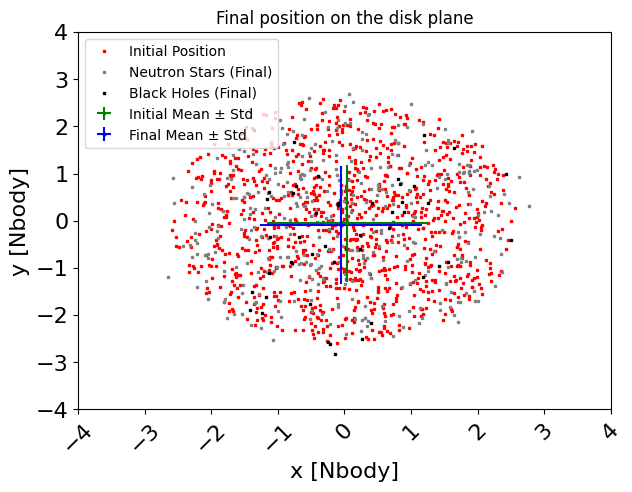

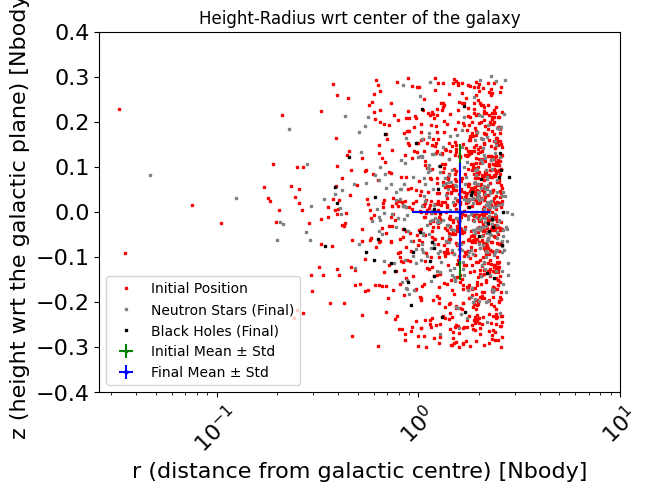

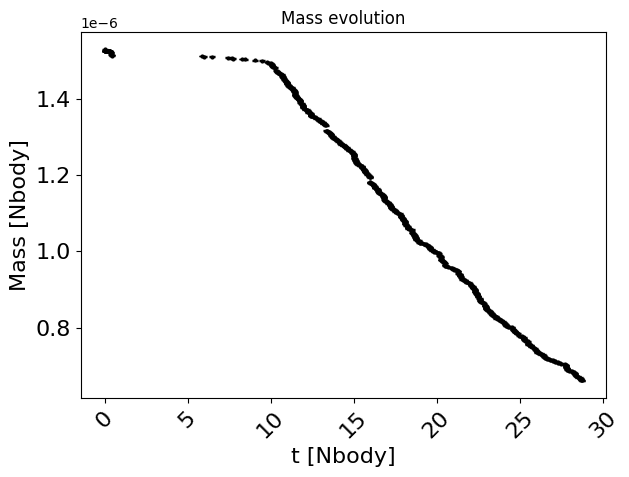

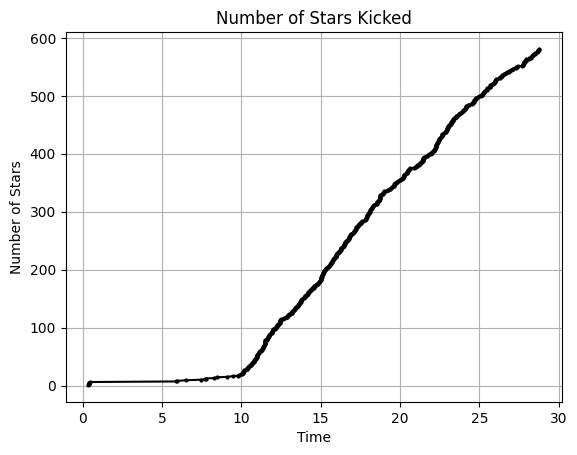

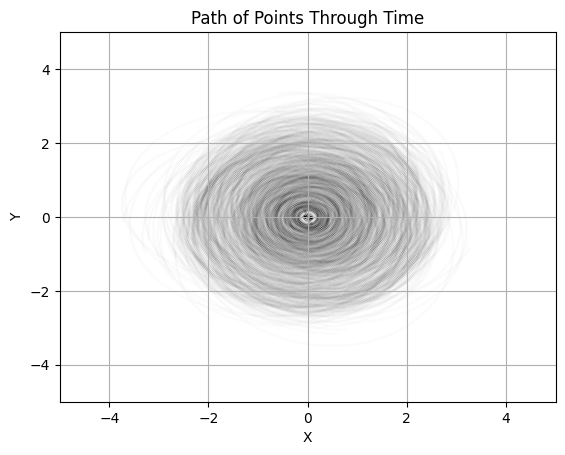

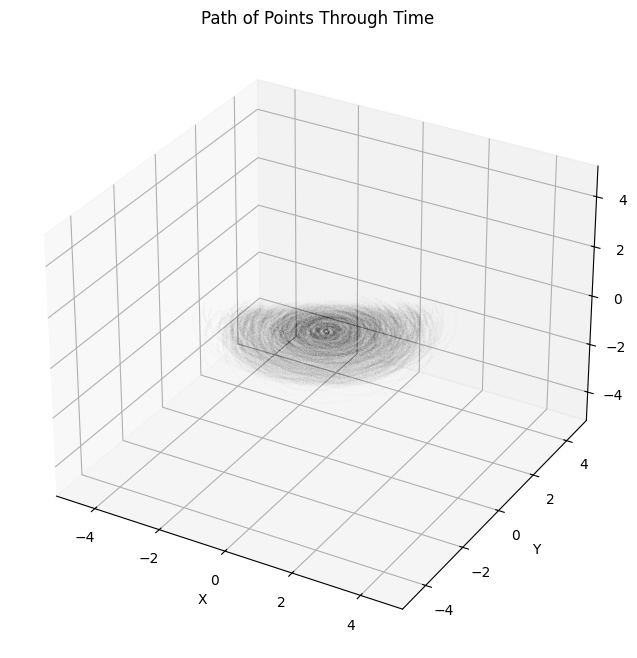

In [4]:
# Initialize SEVN parameters
sevn_init(Hobbs,fast)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.02
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_fast_02.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")

#### Hobbs Slow Z=0.002

Invalid kick speed. Please choose either fast or slow.
System evolution: 3 Gyr
Time: 0
Time before kick: 0.01
Time before kick: 0.02
Time before kick: 0.03
Time before kick: 0.04
Time before kick: 0.05
Time before kick: 0.060000000000000005
Time before kick: 0.07
Time before kick: 0.08
Time before kick: 0.09
Time before kick: 0.09999999999999999
Time before kick: 0.10999999999999999
Time before kick: 0.11999999999999998
Time before kick: 0.12999999999999998
Time before kick: 0.13999999999999999
Time before kick: 0.15
Time before kick: 0.16
Time before kick: 0.17
Time before kick: 0.18000000000000002
Time before kick: 0.19000000000000003
Time before kick: 0.20000000000000004
Time before kick: 0.21000000000000005
Time before kick: 0.22000000000000006
Time before kick: 0.23000000000000007
Time before kick: 0.24000000000000007
Time before kick: 0.25000000000000006
Time before kick: 0.26000000000000006
Time before kick: 0.2700000000000001
Time before kick: 0.2800000000000001
Time before kic

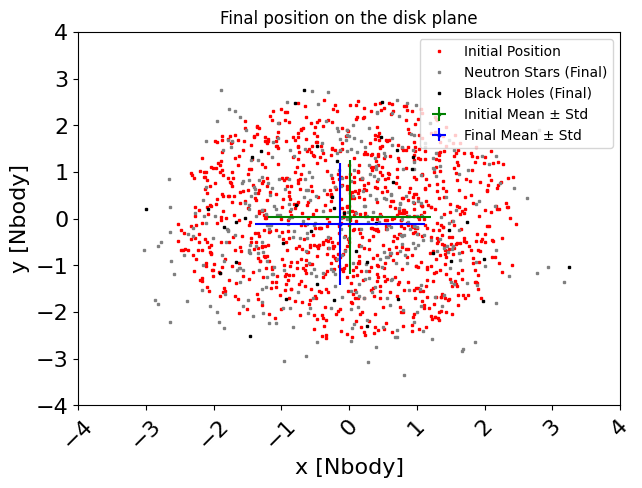

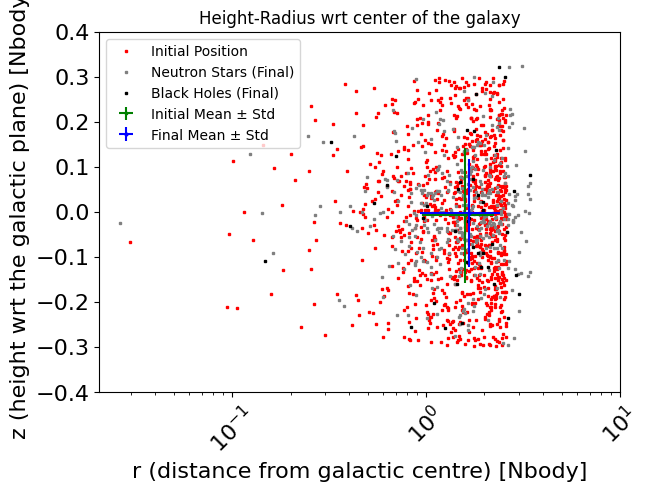

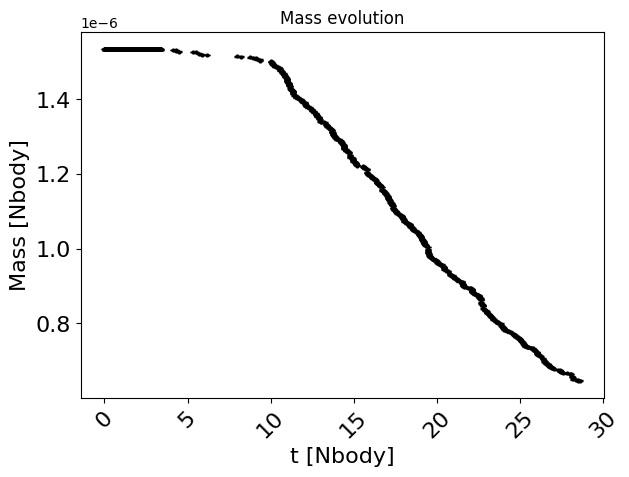

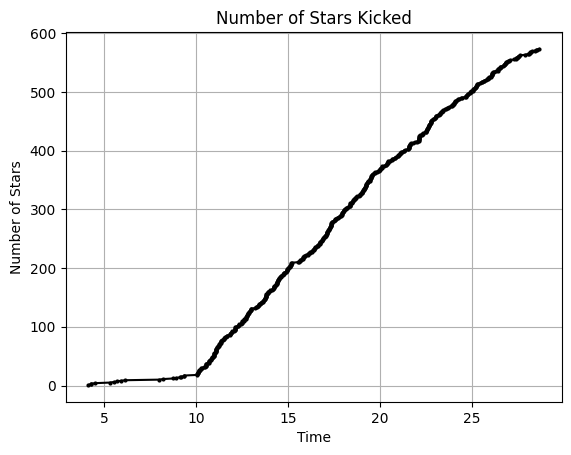

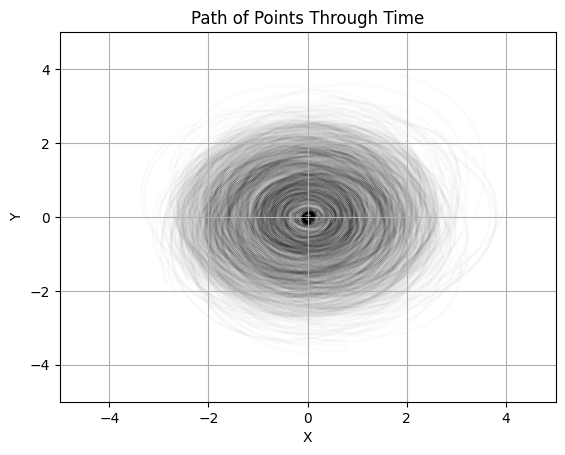

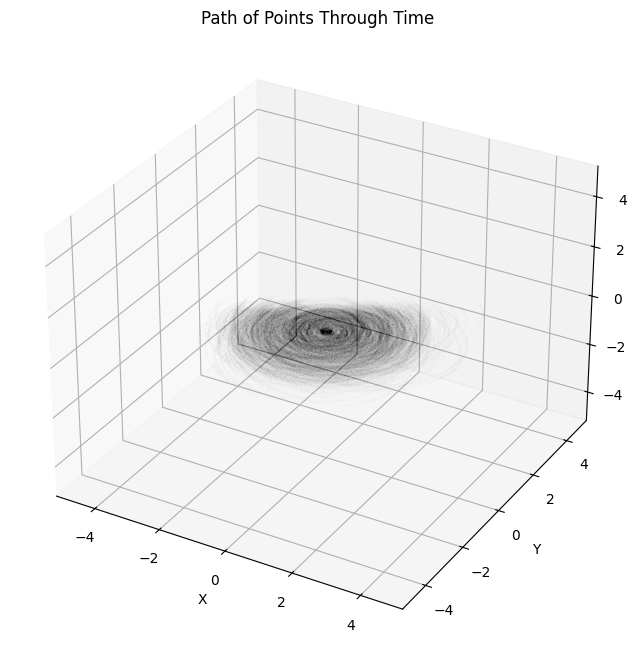

In [7]:
# Initialize SEVN parameters
sevn_init(Hobbs,slow)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.002
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_slow_002.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")

#### Hobbs Slow Z=0.02

Invalid kick speed. Please choose either fast or slow.
System evolution: 3 Gyr
Time: 0
Time before kick: 0.01
Time before kick: 0.02
Time before kick: 0.03
Time before kick: 0.04
Time before kick: 0.05
Time before kick: 0.060000000000000005
Time before kick: 0.07
Time before kick: 0.08
Time before kick: 0.09
Time before kick: 0.09999999999999999
Time before kick: 0.10999999999999999
Time before kick: 0.11999999999999998
Time before kick: 0.12999999999999998
Time before kick: 0.13999999999999999
Time before kick: 0.15
Time before kick: 0.16
Time before kick: 0.17
Time before kick: 0.18000000000000002
Time before kick: 0.19000000000000003
Time before kick: 0.20000000000000004
Time before kick: 0.21000000000000005
Time before kick: 0.22000000000000006
Time before kick: 0.23000000000000007
Time before kick: 0.24000000000000007
Time before kick: 0.25000000000000006
Time before kick: 0.26000000000000006
Time before kick: 0.2700000000000001
Time before kick: 0.2800000000000001
Time before kic

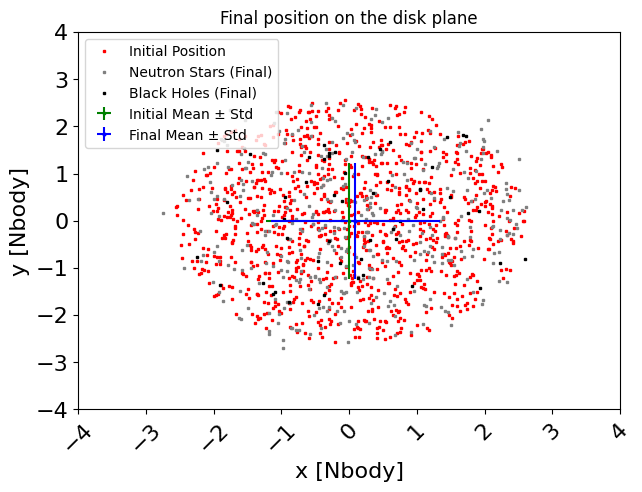

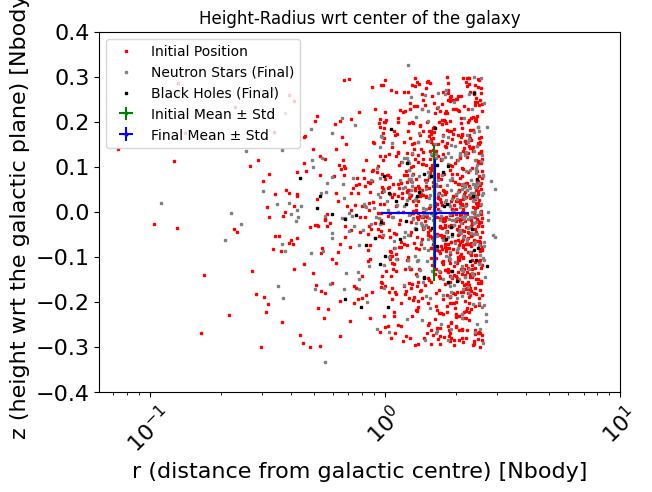

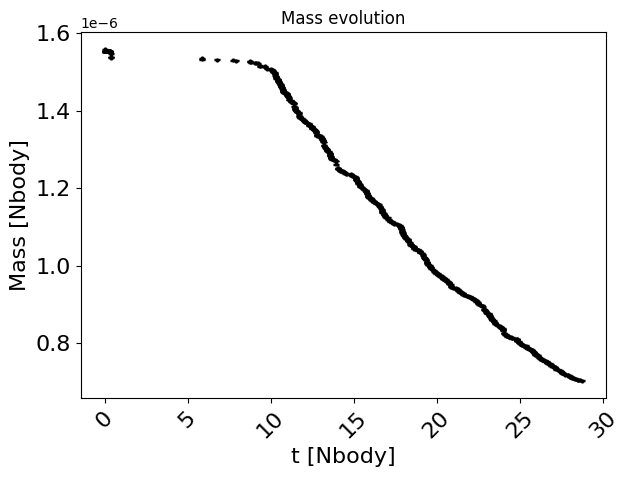

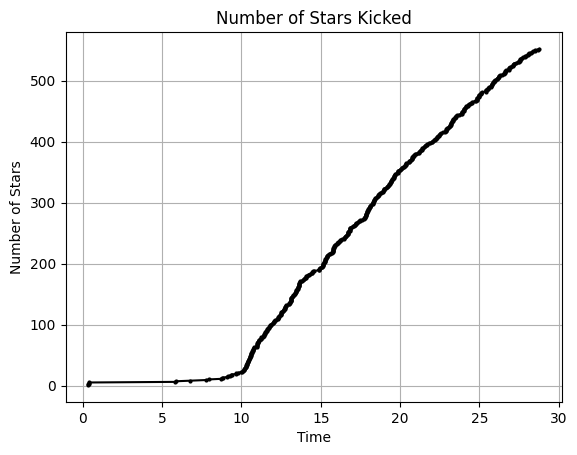

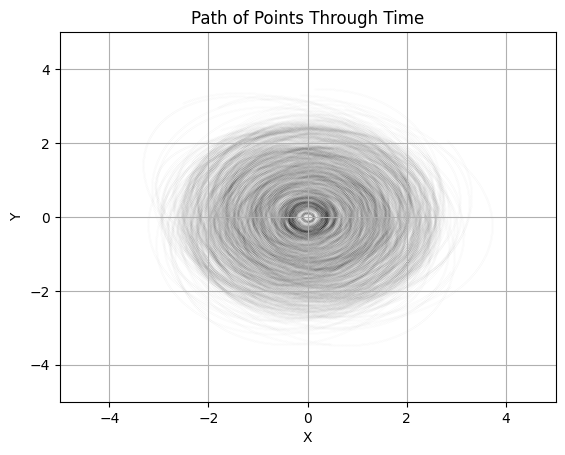

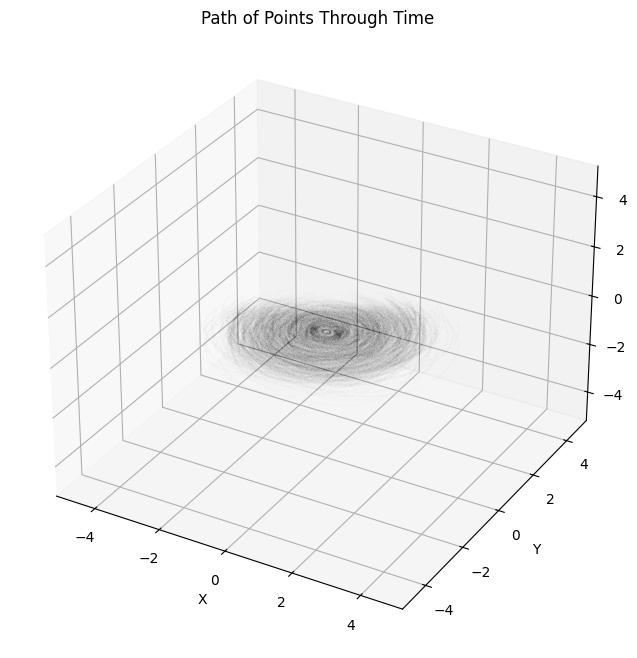

In [8]:
# Initialize SEVN parameters
sevn_init(Hobbs,slow)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.02
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_slow_02.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")

#### Hobbs Pure Fast Z=0.002

In [ ]:
# Initialize SEVN parameters
sevn_init(Hobbs_pure,fast)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.002
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_pure_fast_002.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")

#### Hobbs Pure Fast Z=0.02

In [ ]:
# Initialize SEVN parameters
sevn_init(Hobbs_pure,fast)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.02
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_pure_fast_02.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")

#### Hobbs Pure Slow Z=0.002

In [ ]:
# Initialize SEVN parameters
sevn_init(Hobbs_pure,slow)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.002
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_pure_slow_002.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")

#### Hobbs Pure Slow Z=0.02

In [ ]:
# Initialize SEVN parameters
sevn_init(Hobbs_pure,slow)

# Initialize evolution time, number of samples, metallicity and time step
t_evo = 3
Tend_nb = NU.t_to_Nbody(t_evo)
num_samples = 1000
Z = 0.02
dt_nb = 0.01

# Evolve the system of num_samples stars with Z metallicity for t_evo
vkick, stars_list, initial_part = evolve_stars(num_samples, Z, t_evo)

# Construct a datafram comprising of v_x, v_y, v_z, mass, localtime and remnant type
df = data_df(vkick, stars_list)

# Integrate the stars at different times, apply a kick when the star turns into a remnant
pos, vel, ml, tl, num_stars, time_at_kick, ns_idx, bh_idx = integration_loop(df, initial_part, Tend_nb, dt_nb)

# Plot position distribution, mass evolution, number of stars kicked, and path of stars through time
time_last_kick = np.max(df['Time'])
plots(pos, tl, ml, num_stars, time_at_kick, time_last_kick, ns_idx, bh_idx)

In [ ]:
import pickle

arrays_dict = {
    'pos': pos,
    'tl': tl,
    'ml': ml,
    'vel_nb': vel,
    'num_stars': num_stars
}

# Save the dictionary to a single pickle file
filename = 'arrays_data_Hobbs_pure_slow_02.pkl'
with open(filename, 'wb') as f:
    pickle.dump(arrays_dict, f)
print(f"Saved arrays to {filename}")